<a href="https://colab.research.google.com/github/syedanida/Decision-Trees-and-Ensemble/blob/main/gradientBoosting_fromScratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install required libraries
!pip install matplotlib scikit-learn

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [3]:
# GBM Implementation from Scratch
class GradientBoostingMachine:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.initial_prediction = None

    def fit(self, X, y):
        # Initialize with the mean of the target
        self.initial_prediction = np.mean(y)
        residual = y - self.initial_prediction

        for _ in range(self.n_estimators):
            # Train a weak learner (decision tree) on the residual
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.models.append(tree)

            # Update residuals
            prediction = tree.predict(X)
            residual -= self.learning_rate * prediction

    def predict(self, X):
        # Start with the initial prediction
        y_pred = np.full(X.shape[0], self.initial_prediction)
        for tree in self.models:
            y_pred += self.learning_rate * tree.predict(X)
        return y_pred

In [4]:
# Load the California Housing Dataset
data = fetch_california_housing(as_frame=True)
X = data.data
y = data.target

In [5]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Training the GBM model
gbm = GradientBoostingMachine(n_estimators=100, learning_rate=0.1, max_depth=3)
gbm.fit(X_train, y_train)

In [7]:
# Making predictions on the test set
y_pred = gbm.predict(X_test)

In [8]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on Test Set: {mse}")

Mean Squared Error on Test Set: 0.2940787695751335


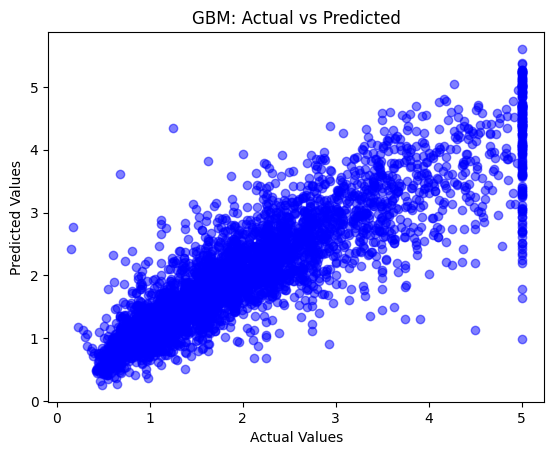

In [9]:
# Visualizing predictions vs actual values
plt.scatter(y_test, y_pred, alpha=0.5, color="blue")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("GBM: Actual vs Predicted")
plt.show()

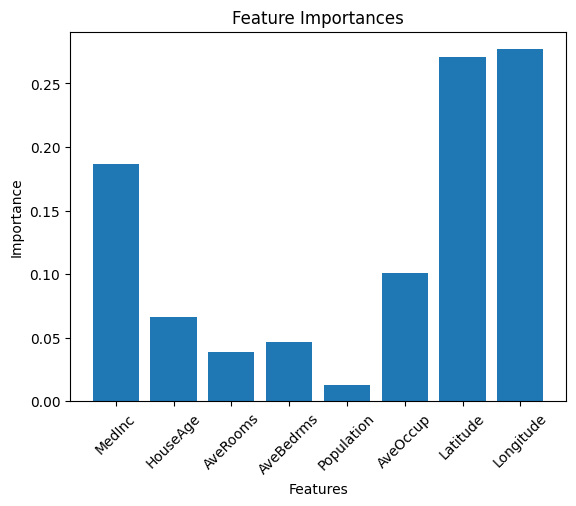

In [10]:
# Feature Importance Visualization
def feature_importances(models, X):
    importances = np.zeros(X.shape[1])
    for model in models:
        importances += model.feature_importances_
    return importances / len(models)

feature_importances = feature_importances(gbm.models, X_train.values)
plt.bar(X_train.columns, feature_importances)
plt.xticks(rotation=45)
plt.xlabel("Features")
plt.ylabel("Importance")
plt.title("Feature Importances")
plt.show()